In [2]:
# importeer nodige libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# lees het bestand in
redwines = pd.read_csv("redwine.csv", delimiter=";", encoding='iso-8859-1')

In [4]:
# verwijder onnodige kolommen
redwines.drop(['country','variety'],axis=1, inplace=True)

In [5]:
# set column id als index
redwines.set_index('id', inplace=True)

In [6]:
# voeg jaartal toe als aparte kolom, en verwijder nan rijen voor jaren (2465 naar 2461)
redwines['year'] = redwines['title'].str.extract(r"([1][9][9]\d|[2][0][0,1,2]\d)")
redwines = redwines[redwines['year'].notnull()]

In [16]:
# drop rows with nan value in it
redwines.dropna(inplace=True)

'1996'

In [18]:
# adds how many wines are tested in a year
redwines['count'] = 1

,points,price,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,count,avg_points_per_year
year,,,,,,,,,,,,
1996,86,14.0,7.5,0.610,1.70,0.076,36.0,60.0,3.10,0.40,1,86.000000
2000,174,98.0,15.7,1.475,4.60,0.156,17.0,75.0,6.68,1.07,2,87.000000
2002,90,22.0,6.7,0.860,2.00,0.100,20.0,57.0,3.60,0.74,1,90.000000
2003,527,127.0,43.8,3.845,12.40,0.505,91.0,217.0,20.38,3.52,6,87.833333
2004,2417,1009.0,213.5,13.900,77.70,2.051,508.0,1470.0,90.54,18.11,27,89.518519
2005,4007,1081.0,385.8,23.465,100.40,4.330,717.0,2086.0,148.91,31.01,45,89.044444
2006,2831,808.0,256.3,16.690,74.50,3.023,497.0,1569.0,106.32,20.90,32,88.468750
2007,6335,2512.0,589.1,36.680,203.75,5.642,1114.0,3281.0,235.39,49.44,71,89.225352
2008,10990,3796.0,1014.7,65.980,309.75,11.240,2084.0,5881.0,406.60,84.34,123,89.349593


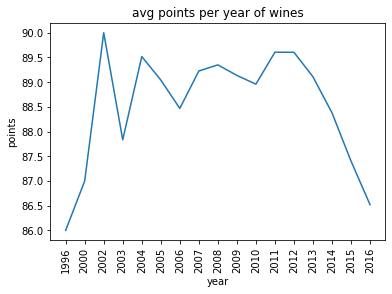

In [20]:
#average of points given per year 
sum_points_per_year = redwines.groupby('year').sum()
sum_points_per_year['avg_points_per_year'] = sum_points_per_year['points'] / sum_points_per_year['count']

In [ ]:
#avg points given per year
plt.plot(sum_points_per_year.index, sum_points_per_year['avg_points_per_year'])
plt.xticks(sum_points_per_year.index, sum_points_per_year.index, rotation='vertical')
plt.title('avg points per year of wines')
plt.xlabel('year')
plt.ylabel('points')
plt.show()